# K-means Clustering Implement From Scratch

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [56]:
df = pd.read_csv('data/College.csv')
df = df.drop('Unnamed: 0', axis=1)
df["Private"] = df["Private"].map({"Yes": 1, "No": 0})
X = df.values

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

## Các hàm cần thiết cho thuật toán phân cụm **K-means**

Trước khi viết thuật toán chính ta cần một số hàm phụ trợ:

a. `kmeans_init_centroids` khởi tạo các tâm cụm. <br>
b. `kmeans_asign_label` tìm nhãn mới có các điểm khi biết tâm cụm<br>
c. `kmeans_update_centroids` cập nhật tâm mới sau khi biết nhãn từng điểm<br>
d. `has_converged` kiểm tra điều kiện dừng của thuật toán

In [58]:
def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        it += 1
    return (centroids, labels, it)


class kmeans_imp:
    # initialization
    def __init__(self, n_cluster, convergence_tolerance, max_iter):
        self.n_cluster = n_cluster
        self.convergence_tolerance = convergence_tolerance
        self.max_iter = max_iter
    # random initial centroids
    def init_centroids(self, X, k):
        return X[np.random.choice(X.shape[0], k, replace=False)]
    # assign labels to each data
    def assign_labels(self, X, centroids):
        distances = np.sum((X[:, np.newaxis] - centroids)**2, axis=2)
        return np.argmin(distances, axis = 1)
    # update centroids
    def update_centroids(self, X, labels, K):
        centroids = np.zeros((K, X.shape[1]))
        for k in range(K):
            Xk = X[labels == k, :]
            centroids[k,:] = np.mean(Xk, axis = 0)
        return centroids
    # check convergence
    def has_converged(self, centroids, new_centroids):
        return (np.abs(centroids - new_centroids) < self.convergence_tolerance).all()

    def fit(self, X):
        self.cluster_centers_ = [self.init_centroids(X, self.n_cluster)]
        self.labels_ = []
        self.n_iter = 0
        while True:
            self.labels_.append(self.assign_labels(X, self.cluster_centers_[-1]))
            new_centroids = self.update_centroids(X, self.labels_[-1], self.n_cluster)
            if self.has_converged(self.cluster_centers_[-1], new_centroids):
                break
            self.cluster_centers_.append(new_centroids)
            self.n_iter += 1
            if self.n_iter >= self.max_iter:
                break
        self.inertia_ = np.sum(np.linalg.norm(X - clusters[labels], axis = 1) ** 2)
    
    def transform(self, X):
        return self.assign_labels(X, self.cluster_centers_[-1])

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
    
    def predict(self, data):
        dist_mtr = np.zeros(self.n_cluster)
        for i in range(self.n_cluster):
            dist_mtr[i] = np.linalg.norm(data - self.cluster_centers_[-1][i])
        return np.argmin(dist_mtr)
    
    def fit_predict(self, X, data):
        self.fit(X)
        return self.predict(data)

kmeans_imp = kmeans_imp(n_cluster=3, convergence_tolerance=1e-4, max_iter=10000)
kmeans_imp.fit(X)

In [59]:
labels = kmeans_imp.labels_[-1]
clusters = kmeans_imp.cluster_centers_[-1]

In [60]:
kmeans_imp.inertia_

8739.886390743468

Áp dụng thuật toán vào dữ liệu ban đầu:

### Sử dụng thư viện của `sk-learn`

In [61]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42).fit(X)
print('Centers found by scikit-learn:')
print(model.cluster_centers_)

pred_labels = model.predict(X)
model.inertia_

Centers found by scikit-learn:
[[ 0.07396429 -0.42945619 -0.42240272 -0.40333553 -0.53948459 -0.59016143
  -0.38279228 -0.18191562 -0.47283161 -0.38981263 -0.10941073  0.00540659
  -0.66025879 -0.65483575  0.18977194 -0.32740231 -0.44453258 -0.36326522]
 [-1.48158295  1.51320731  1.65266849  1.83917432  0.06126816  0.26672235
   1.91613111  1.38292533 -0.66507767 -0.30196116  0.21526306  0.74585005
   0.622841    0.59079217  0.71403532 -0.62939415 -0.1958458  -0.41909236]
 [ 0.56113935 -0.03819473 -0.11219876 -0.22572853  0.78757629  0.77085483
  -0.29173229 -0.35316615  1.01673878  0.72633275  0.06759673 -0.34693575
   0.71505498  0.72141484 -0.61114462  0.78072221  0.7608418   0.73940846]]


8740.173751386179

Ta thấy kết quả rất gần với kỳ vọng

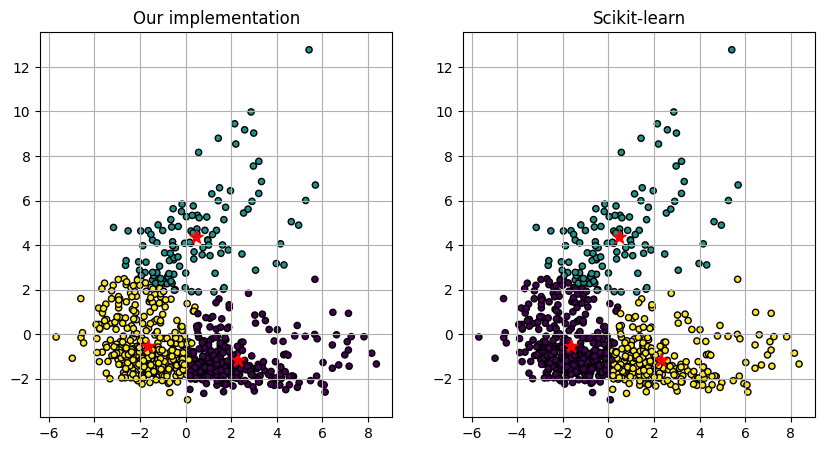

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# new cluster centers after PCA
clusters_pca = pca.transform(clusters)
clusters_pca_scikit = pca.transform(model.cluster_centers_)

# visualize
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.grid()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, edgecolor='k', s=20)
plt.scatter(clusters_pca[:, 0], clusters_pca[:, 1], c='red', marker='*', s=100)
plt.title('Our implementation')
plt.subplot(122)
plt.grid()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_labels, edgecolor='k', s=20)
plt.scatter(clusters_pca_scikit[:, 0], clusters_pca_scikit[:, 1], c='red', marker='*', s=100)
plt.title('Scikit-learn')
plt.show()
